<a href="https://colab.research.google.com/github/Vannod/SistemasFyC/blob/P2_Sistemas/Tarea_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Bursátil
Realizar un programa en Python o R que consultando una base de datos (la
que usted prefiera) calcule y grafique VWMA y MACD de un menú de
acciones.

## Librerías

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Acciones

*   Kohl's Corporation (KSS)
*   Best Buy (BBY)
*   General Motors Company (GM)


Escoja un activo:
1. KSS
2. BBY
3. GM
4. Salir
Ingrese una opción: 3


[*********************100%***********************]  1 of 1 completed


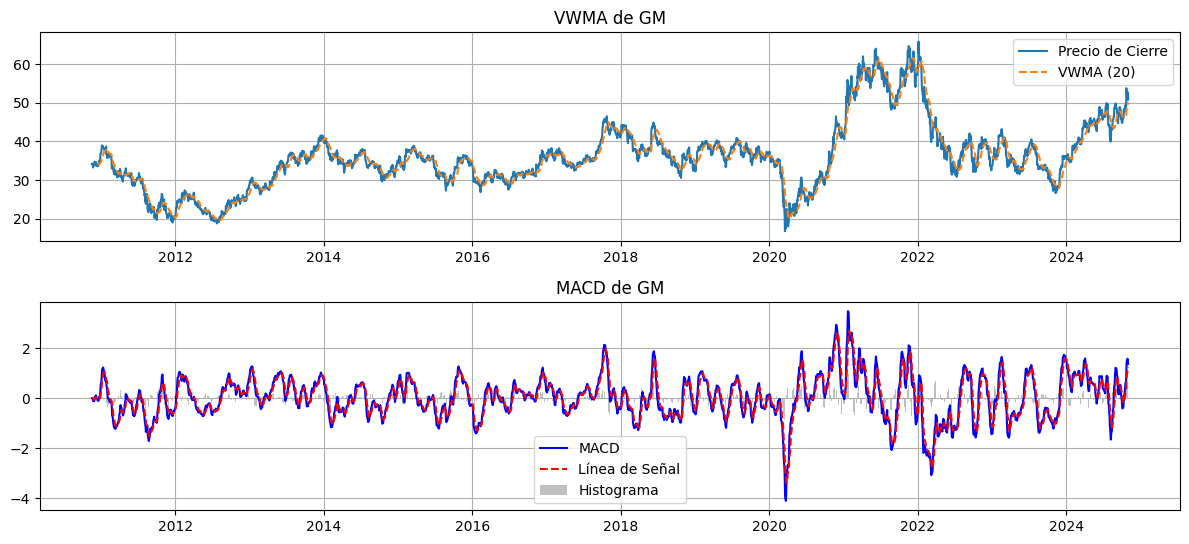

Escoja un activo:
1. KSS
2. BBY
3. GM
4. Salir


In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

acciones = ['KSS', 'BBY', 'GM']

data_source = 'yahoo'
start_date = '2000-01-01'
end_date = '2024-11-01'

# MACD
def MACD(datos, ventana_corta, ventana_larga, señal):
    EMA_CP = datos['Close'].ewm(span=ventana_corta, adjust=False).mean()
    EMA_LP = datos['Close'].ewm(span=ventana_larga, adjust=False).mean()
    macd = EMA_CP - EMA_LP
    signal = macd.ewm(span=señal, adjust=False).mean()
    histograma = macd - signal
    return macd, signal, histograma

# VWMA
def VWMA(datos, ventana):
    VWMA = (
        (datos['Volume'] * datos['Close']).rolling(window=ventana).sum()
        / datos['Volume'].rolling(window=ventana).sum()
    )
    return VWMA

# Función principal de indicadores
def indicadores(acciones):
    datos = yf.download(acciones, start=start_date, end=end_date, group_by='ticker')

    for activo in acciones:
        datos_activo = datos[activo].copy()

        # Cálculo de VWMA
        ventana_vwma = 20  # Se puede ajustar esta ventana
        datos_activo['VWMA'] = VWMA(datos_activo, ventana_vwma)

        # Cálculo de MACD
        ventana_corta, ventana_larga, señal = 12, 26, 9
        datos_activo['MACD'], datos_activo['Signal_Line'], datos_activo['Histograma'] = MACD(
            datos_activo, ventana_corta, ventana_larga, señal
        )

        # Grafica VWMA
        plt.figure(figsize=(12, 8))
        plt.subplot(3, 1, 1)
        plt.plot(datos_activo.index, datos_activo['Close'], label='Precio de Cierre')
        plt.plot(datos_activo.index, datos_activo['VWMA'], label=f'VWMA ({ventana_vwma})', linestyle='--')
        plt.title(f'VWMA de {activo}')
        plt.legend()
        plt.grid()

        # Grafica MACD
        plt.subplot(3, 1, 2)
        plt.plot(datos_activo.index, datos_activo['MACD'], label='MACD', color='blue')
        plt.plot(datos_activo.index, datos_activo['Signal_Line'], label='Línea de Señal', linestyle='--', color='red')
        plt.bar(datos_activo.index, datos_activo['Histograma'], label='Histograma', color='gray', alpha=0.5)
        plt.title(f'MACD de {activo}')
        plt.legend()
        plt.grid()

        plt.tight_layout()
        plt.show()

# Menú
def menu(acciones):
    for i in range(len(acciones)):
        print(f'{i+1}. {acciones[i]}')
    print('4. Salir')

while True:
    print('Escoja un activo:')
    menu(acciones)
    opcion = input('Ingrese una opción: ')
    if opcion == '4':
        break

    try:
        opcion = int(opcion)
        if 1 <= opcion <= 3:
            indicadores([acciones[opcion - 1]])
        else:
            print('Opción inválida')
    except ValueError:
        print('Opción inválida')